In [47]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
from matplotlib import rcParams, cm
from pyne import serpent
from pyne import nucname
#rcParams['font.family'] = 'Times New Roman'
#rcParams['font.size'] = 14
#det0 = serpent.parse_det('../serpent/core_det0.m')
#det0 = serpent.parse_det('../serpent/bw_breeding/core_det0.m')
det0 = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/safety_parameters/init/both_900K/core_gre7_det0.m')
#det03 = serpent.parse_det('../serpent/core_300K_det0.m')

det10 = serpent.parse_det('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/detector_plotting/both_900K/core_eq_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
# Power generation distribution
x_pow = det0['DETpowxyX']
y_pow = det0['DETpowxyY']
pow_den_raw = det0['DETpowxy']
fission_raw = det0['DETfisxy']
breed_raw = det0['DETbreeding']
fluxxy_raw = det0['DETfluxxy']
x = det0['DETflux_radX']
z = det0['DETflux_axialZ']
flux_rad = det0['DETflux_rad']
flux_rad_1 = det0['DETflux_rad1']
flux_rad_2 = det0['DETflux_rad2']
flux_axial = det0['DETflux_axial']

eq_flux_rad = det10['DETflux_rad']
eq_flux_rad_1 = det10['DETflux_rad1']
eq_flux_rad_2 = det10['DETflux_rad2']
eq_flux_axial = det10['DETflux_axial']
#tot_flux_rad  = np.reshape (flux_rad[:,1],  (len(x),4))
#fast_flux_rad = np.reshape (flux_rad_1[:,1], (len(x),4))
#ther_flux_rad = np.reshape (flux_rad_2[:,1], (len(x),4))
pow_cell_vol = (449.58-0)*(x_pow[1,0]-x_pow[0,0])   # Volume of POW generation mesh cell
pow_den = np.reshape (pow_den_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
fission_den = 4e+4*np.reshape (fission_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
fluxxy = 4e+2*np.reshape (fluxxy_raw[:,10], (len(x_pow), len(y_pow)))     # Normalize by max value
breed_den_0 = np.reshape (breed_raw[:,10], (len(x_pow), len(y_pow)))   # Normalize by total flux
breed_den = abs(breed_den_0 / fluxxy)
#print x_pow[:,0]
#print pow_cell_vol
#print pow_den
#print tot_flux_rad[:,3]
#print flux_rad_1[:,10]
#print flux_rad[:,11]
#print (breed_den)

/home/andrei2/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


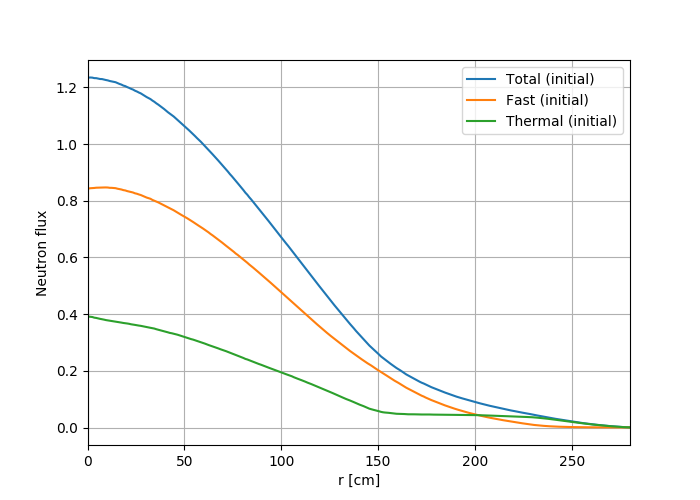

<IPython.core.display.Javascript object>


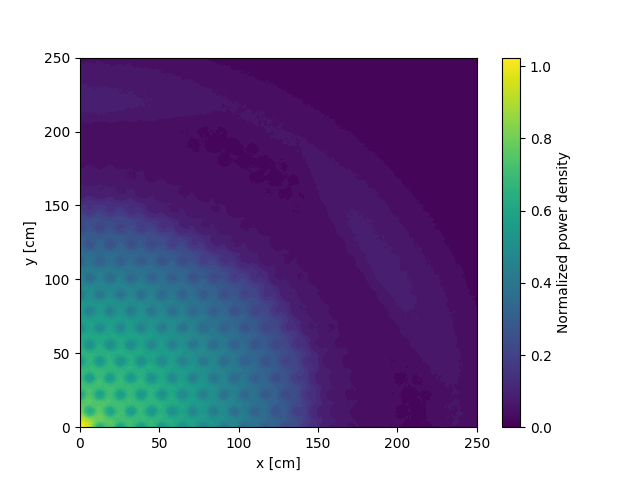

<IPython.core.display.Javascript object>


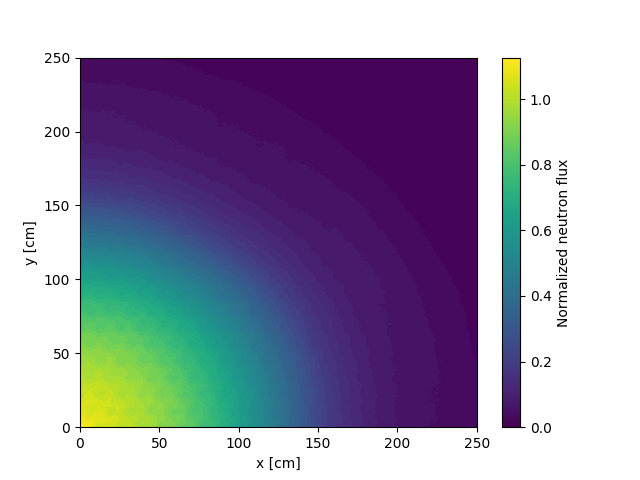

Max power density 119025.0
Max flux 119025.0
Max flux 0.0


In [50]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.05)
ax.set_xlim(0.0,280.0)
ax.plot(x[:,2], flux_rad[:,10], '-',label='Total (initial)')
#ax.plot(x[:,2], eq_flux_rad[:,10], '-.',color='blue',label='Total (equilibrium)')
#ax.fill_between(x[:,2], flux_rad[:,10]*(1-flux_rad[:,11]), flux_rad[:,10]*(1+flux_rad[:,11]),alpha=1, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=1)
ax.plot(x[:,2], flux_rad_1[:,10], '-', label='Fast (initial)')
#ax.plot(x[:,2], eq_flux_rad_1[:,10], '-.', label='Fast (equilibrium)')
ax.plot(x[:,2], flux_rad_2[:,10], '-', label='Thermal (initial)')
#ax.plot(x[:,2], eq_flux_rad_2[:,10], '-.', label='Thermal (equilibrium)')
ax.legend(loc=0)
ax.set_ylabel('Neutron flux')
ax.set_xlabel('r [cm]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/radial_flux_init.png',bbox_inches='tight', dpi=1100)
# Initialize figure
#fig_2 = matplotlib.pyplot.figure(2, figsize=[7,7])
#ax = fig_2.add_subplot(111)
#ax.grid(True)
#ax.set_ylim(0,1.05)
#ax.set_xlim(-345.0,345.0)
#ax.semilogx(energy, spectrum_grid[:,10], '-', label='Averaged', color='#ff8100')
#ax.plot(z[:,0], flux_axial[:,10], '-', label='Total neutron flux')
#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
#ax.legend(loc=0)
#ax.set_ylabel('Neutron flux')
#ax.set_xlabel('z [cm]')
#ax.set_title(plot_title)
#fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-geo/figures/figure_3_1.png',bbox_inches='tight')
# Create heatmap
fig_3 = matplotlib.pyplot.figure(3)
#fig_3.set_size_inches(15, 10, forward=True)
ax = fig_3.add_subplot(111)
pc = ax.pcolor(fission_den,cmap=cm.viridis)
#ax.grid(True)
#ax.imshow(pow_den, cmap='coolwarm', interpolation='nearest')
#ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.jet)
ax.contourf(x_pow[:,0],y_pow[:,0],fission_den,50,cmap=cm.viridis)
cbar = fig_3.colorbar(pc)
cbar.set_label('Normalized power density')
ax.set_xlabel('x [cm]')
ax.set_xlim(0,250)
ax.set_ylabel('y [cm]')
ax.set_ylim(0,250)
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/power_distribution_init.png',bbox_inches='tight', dpi=1100)

# Create heatmap
fig_4 = matplotlib.pyplot.figure(4)
#fig_3.set_size_inches(15, 10, forward=True)
matplotlib.pyplot.figure(4)
ax = fig_4.add_subplot(111)
pc = ax.pcolor(fluxxy,cmap=cm.viridis)
#ax.grid(True)
#ax.imshow(pow_den, cmap='coolwarm', interpolation='nearest')
#ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.jet)
ax.contourf(x_pow[:,0],y_pow[:,0],fluxxy / np.max(fluxxy),50,cmap=cm.viridis)
cbar = fig_4.colorbar(pc)
cbar.set_label(r'Normalized neutron flux')
ax.set_xlabel('x [cm]')
ax.set_xlim(0,250)
ax.set_ylabel('y [cm]')
ax.set_ylim(0,250)
fig_4.show()

#matplotlib.pyplot.show()
#matplotlib.pyplot.close()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/breeding_distribution_init.png',bbox_inches='tight', dpi=700)

print ('Max power density ' + str(np.amax(fission_raw)))
print ('Max flux ' + str(np.amax(fluxxy_raw)))
print ('Max flux ' + str(np.amin(fluxxy_raw)))
#print(breed_den_0)
#print(fluxxy)
#print (breed_den_0/fluxxy)

/home/andrei2/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


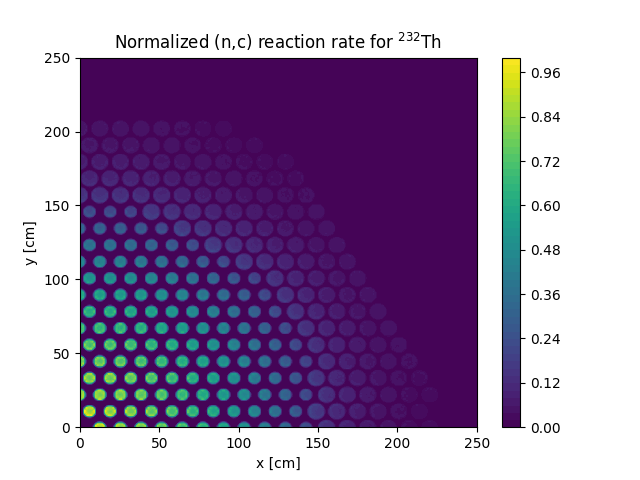

<IPython.core.display.Javascript object>


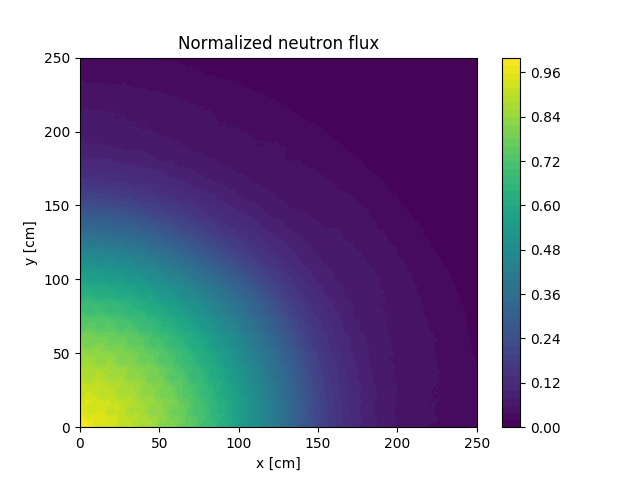

In [59]:
import math
norm_flux = fluxxy / np.max(fluxxy)
norm_breed = breed_den_0 / np.max(breed_den_0)

z = norm_breed / norm_flux
           
fig_6 = matplotlib.pyplot.figure(6)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.title(r'Normalized (n,c) reaction rate for $^{232}$Th')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], norm_breed,50, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/breeding_distribution_init.png', bbox_inches='tight', dpi=1100)

fig_7 = matplotlib.pyplot.figure(7)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.title(r'Normalized neutron flux')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], norm_flux,50, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

(345, 345)


/home/andrei2/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


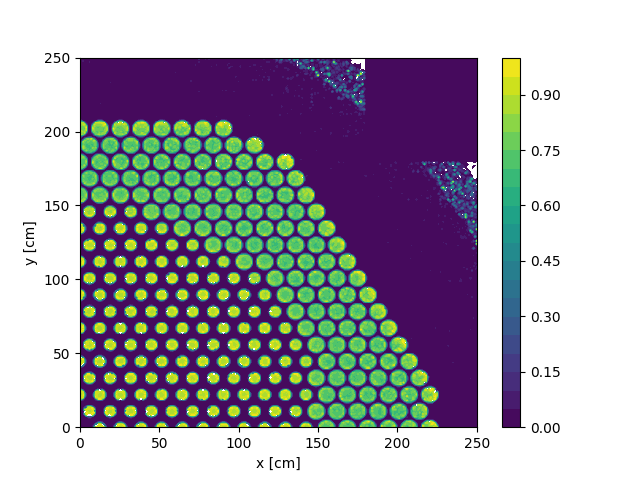

In [31]:
q =  norm_breed / norm_flux
print (np.shape(q))
for i in range(np.shape(q)[0]):
    for j in range(np.shape(q)[1]):
        if q[i,j] > 1.0:
            q[i,j] = np.nan
          
fig_9 = matplotlib.pyplot.figure(9)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], q, 20, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
